In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np
import core.utils as utils

In [14]:
# logs = [
#     { "label" : "mini_batch_sgd",  "path" : "/home/onycom/study/logs/20210518_213718/minibatch_0.log"},
#     { "label" : "local_sgd",       "path" : "/home/onycom/study/logs/20210518_213718/local(k=4)_0.log"},
#     { "label" : "async_local_sgd", "path" : "/home/onycom/study/logs/20210518_213718/async(k=4)_0.log" },
#     { "label" : "loss_async_sgd",  "path" :  "/home/onycom/study/logs/20210518_213718/loss_0.log" }
# ]

# /home/onycom/study/logs/20210519_174541
# logs = [
#     { "label" : "local(k=4)",  "path" : "/home/onycom/study/logs/20210519_194439/loss(r=0.5)_0.log"},
#     { "label" : "local(k=8)",       "path" : "/home/onycom/study/logs/20210519_194439/loss(r=0.75)_0.log"},
#     { "label" : "local(k=16)", "path" : "/home/onycom/study/logs/20210519_194439/loss(r=1.0)_0.log" },
#     { "label" : "local(k=32)",  "path" :  "/home/onycom/study/logs/20210519_194439/loss(r=1.25)_0.log" }
# ]

# logs = [
#     { "label" : "Local SGD (k=4)", "path" : "/home/onycom/study/logs/20210531_003353/local(k=4)_0.log" },
#     { "label" : "Parallel SGD", "path" :  "/home/onycom/study/logs/20210530_151009/parallel SGD_0.log" },
#     { "label" : "DCL SGD", "path" :  "/home/onycom/study/logs/20210530_151009/loss2_0.log" }
# ]

logs = [
    { "label" : "DCL-SGD-min0", "path" :  "/home/onycom/study/logs/20210601_232419/loss_min_0.log" },
#     { "label" : "DCL-SGD-min1", "path" :  "/home/onycom/study/logs/20210601_232419/loss_min_1.log" },
#     { "label" : "DCL-SGD-min2", "path" :  "/home/onycom/study/logs/20210601_232419/loss_min_2.log" },
#     { "label" : "DCL-SGD-min3", "path" :  "/home/onycom/study/logs/20210601_232419/loss_min_3.log" },
    { "label" : "DCL-SGD-1", "path" :  "/home/onycom/study/logs/20210530_151009/loss2_0.log" },
     { "label" : "AL-SGD (k=4)", "path" : "/home/onycom/study/logs/20210531_003353/async(k=4)_2.log" },
     { "label" : "AL-SGD (k=8)", "path" : "/home/onycom/study/logs/20210531_212331/async2(k=8)_1.log" },
     { "label" : "AL-SGD (k=16)", "path" : "/home/onycom/study/logs/20210531_212331/async2(k=16)_1.log" },
    { "label" : "Local SGD (k=4)", "path" : "/home/onycom/study/logs/20210601_232419/loss_0.log" },
    { "label" : "Local SGD (k=8)", "path" : "/home/onycom/study/logs/20210531_003353/local(k=8)_0.log" },
    { "label" : "Local SGD (k=16)", "path" : "/home/onycom/study/logs/20210531_003353/local(k=16)_3.log" },  
]

# 오리지널
# logs = [
#     { "label" : "DCL-SGD-1", "path" :  "/home/onycom/study/logs/20210530_151009/loss2_0.log" },
# #     { "label" : "Local SGD (k=4)", "path" : "/home/onycom/study/logs/20210531_003353/local(k=4)_0.log" },
# #     { "label" : "Local SGD (k=8)", "path" : "/home/onycom/study/logs/20210531_003353/local(k=8)_0.log" },
#     { "label" : "Async Local SGD (k=16)", "path" : "/home/onycom/study/logs/20210531_212331/async2(k=16)_0.log" },
#     { "label" : "Local SGD (k=16)", "path" : "/home/onycom/study/logs/20210531_003353/local(k=16)_1.log" },
#     { "label" : "Parallel SGD", "path" :  "/home/onycom/study/logs/20210530_151009/parallel SGD_0.log" },
# ]

# # # 동기화 기법 비교
# logs = [
#     { "label" : "DCL SGD", "path" :  "/home/onycom/study/logs/20210530_151009/loss2_0.log" },
#      { "label" : "Async Local SGD (k=4)", "path" : "/home/onycom/study/logs/20210531_003353/async(k=4)_2.log" },
#     { "label" : "Async Local SGD (k=8)", "path" : "/home/onycom/study/logs/20210531_212331/async2(k=8)_1.log" },
#      { "label" : "Async Local SGD (k=16)", "path" : "/home/onycom/study/logs/20210531_212331/async2(k=16)_1.log" },
#      { "label" : "Local SGD (k=4)", "path" : "/home/onycom/study/logs/20210531_003353/local(k=4)_0.log" },
#     { "label" : "Local SGD (k=8)", "path" : "/home/onycom/study/logs/20210531_003353/local(k=8)_0.log" },
#      { "label" : "Local SGD (k=16)", "path" : "/home/onycom/study/logs/20210531_003353/local(k=16)_3.log" },
# ]

# logs = [
#     { "label" : "Local SGD (k=4)", "path" : "/home/onycom/study/logs/20210531_003353/local(k=4)_0.log" },
#     { "label" : "Async Local SGD (k=4)", "path" : "/home/onycom/study/logs/20210531_003353/async(k=4)_2.log" },
#     { "label" : "DCL SGD", "path" :  "/home/onycom/study/logs/20210530_151009/loss2_0.log" }
# ]



for log in logs:
    log['values'] = utils.parseLog(log['path'])
    t = log['values']['t_time']
    log['values']['sum_time'] = [ sum(t[0:idx+1]) for idx in range(len(t)) ]

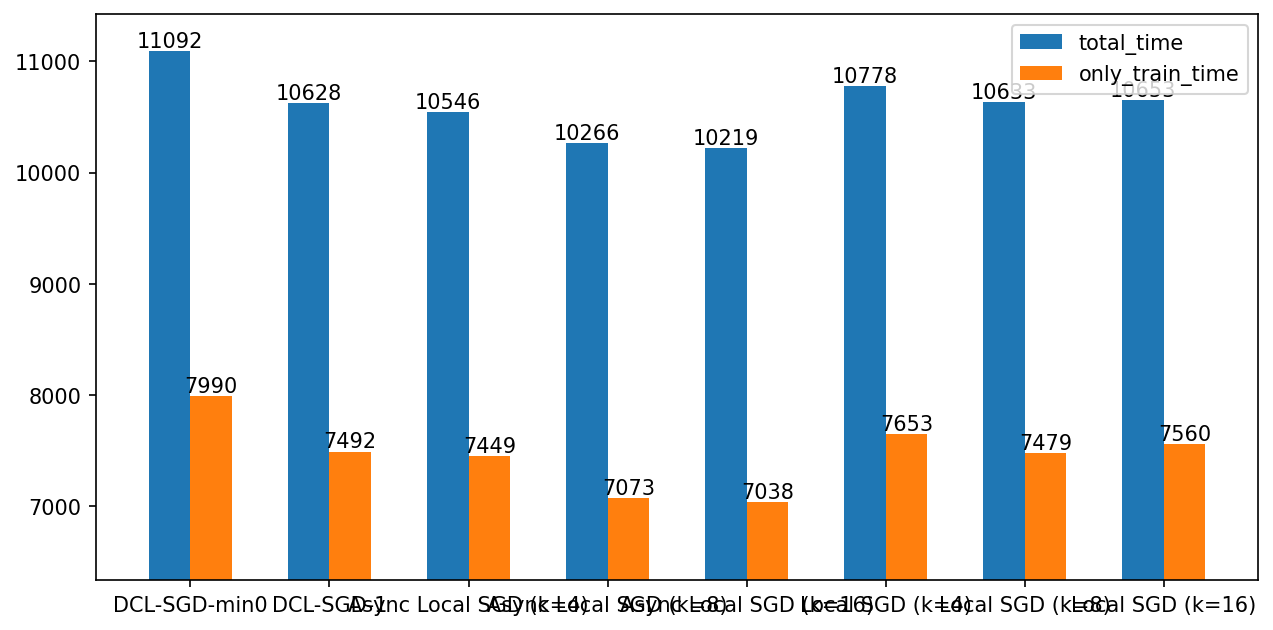

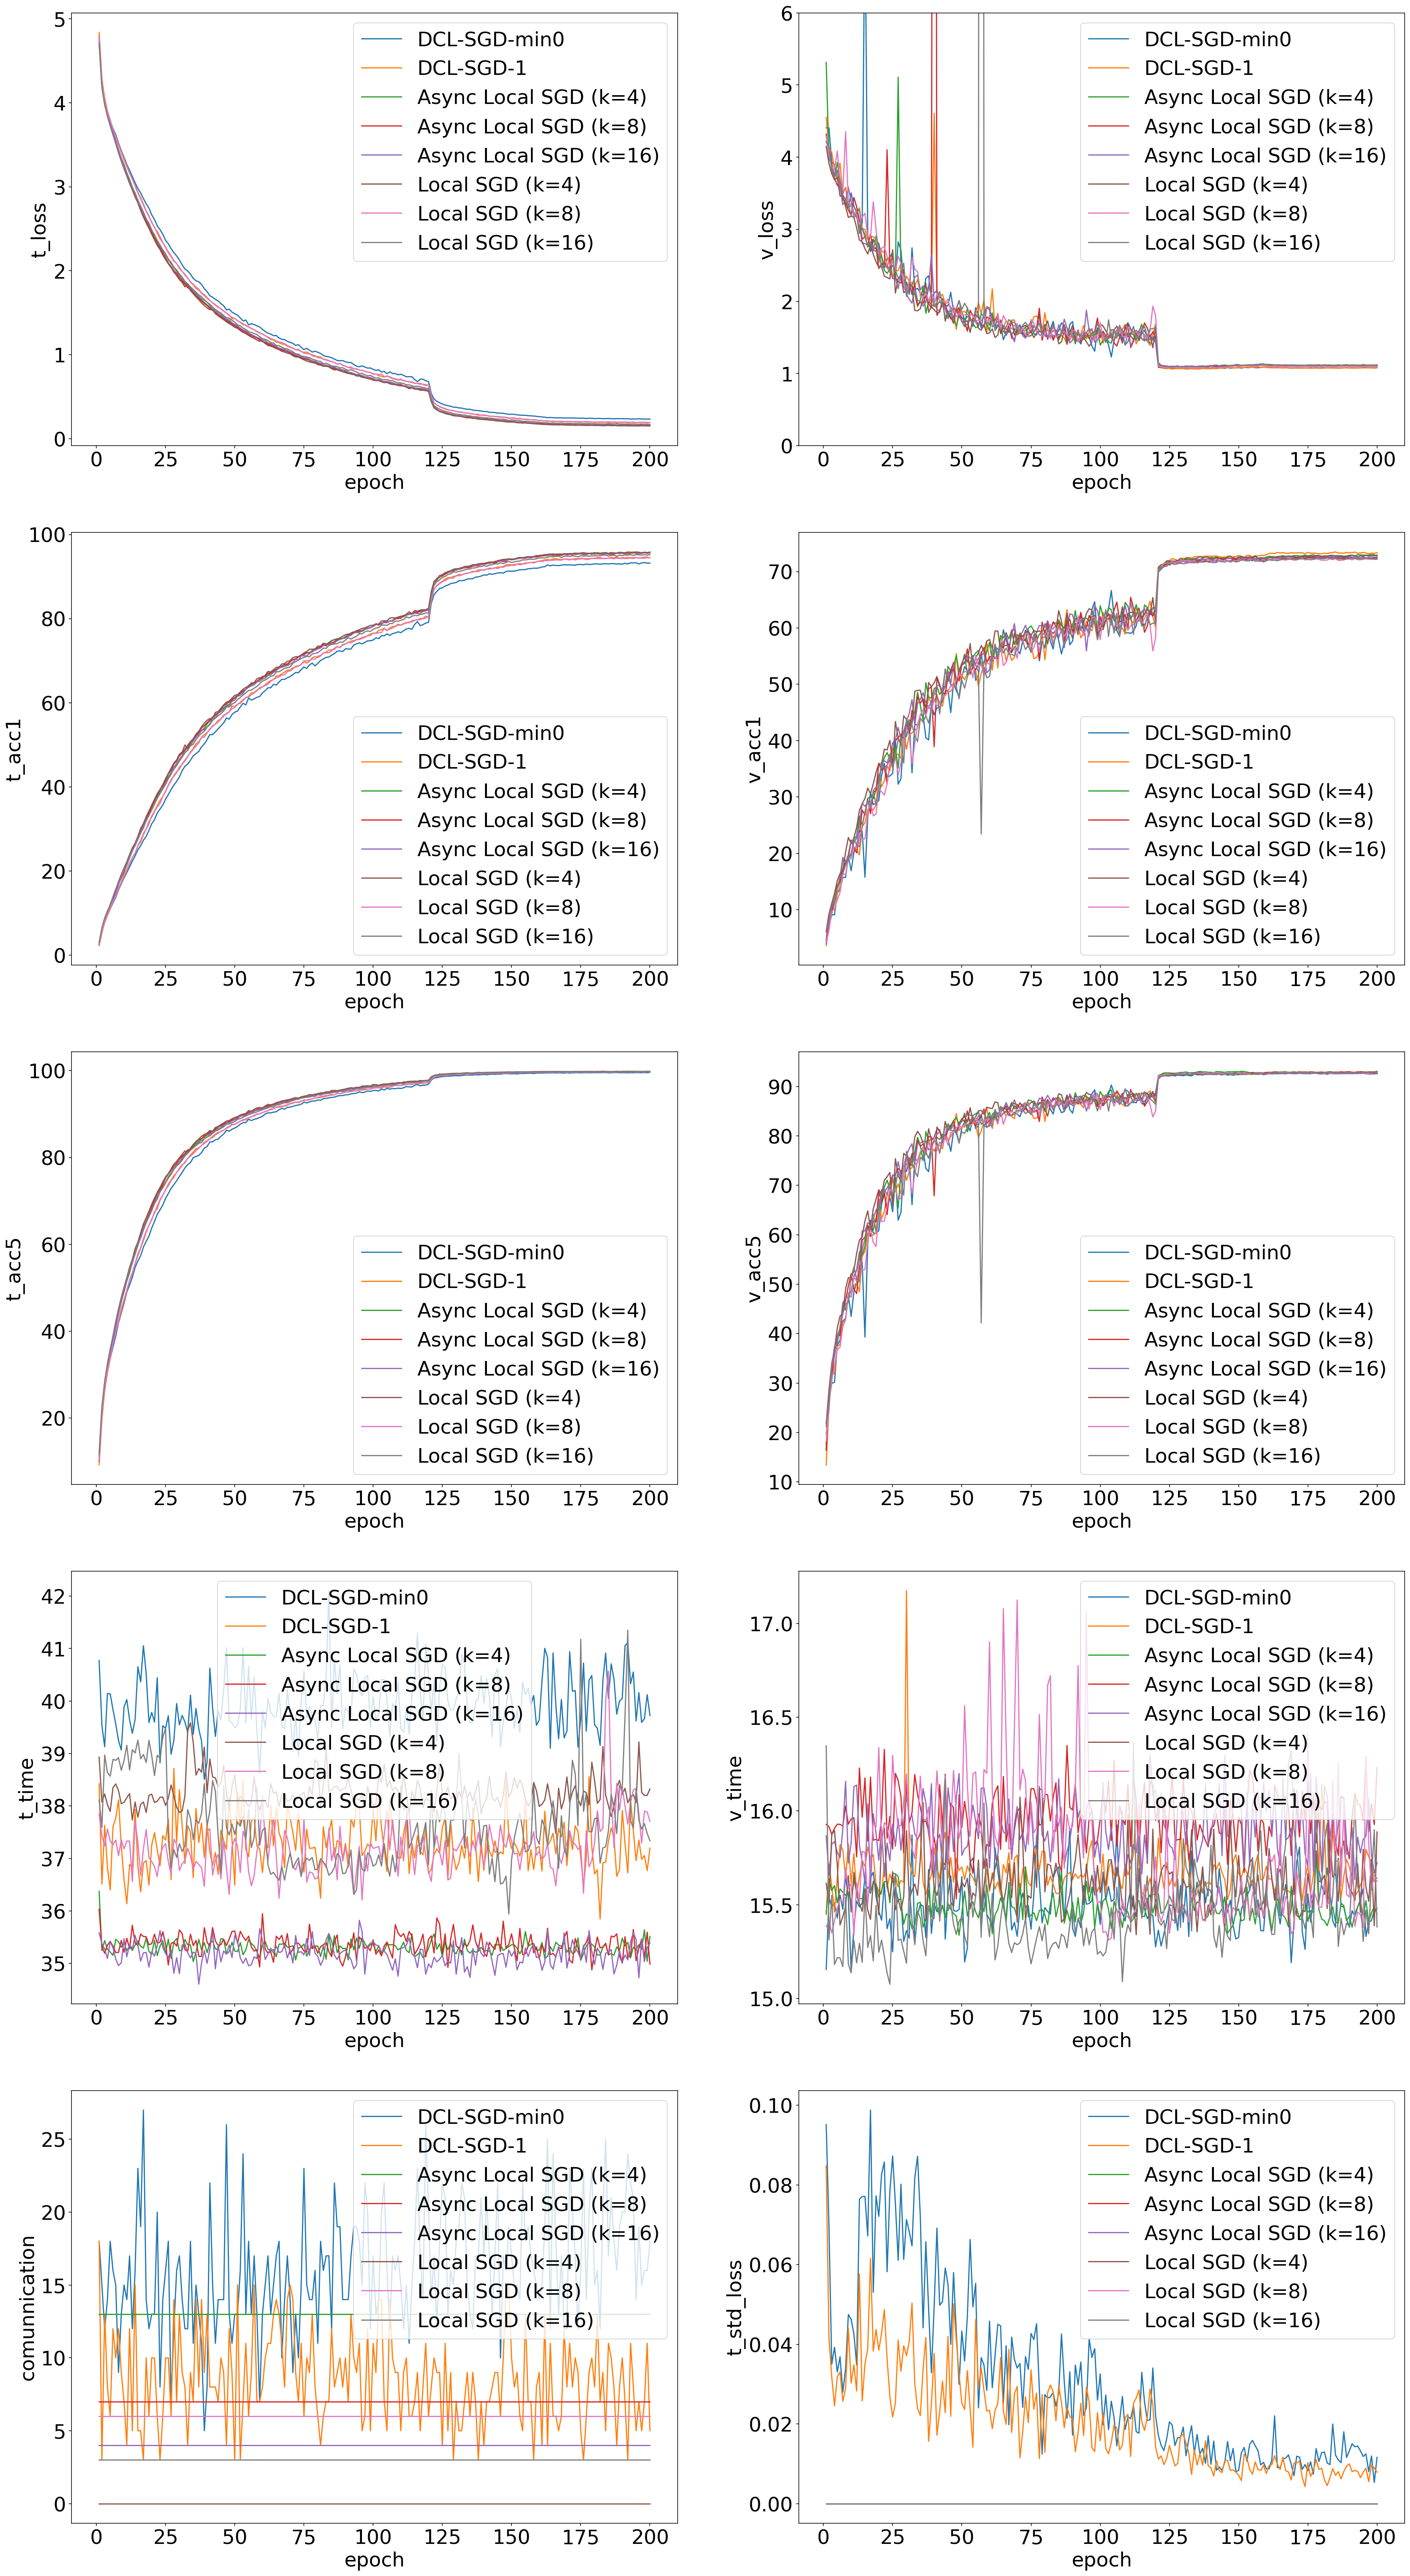

In [15]:
utils.createTimeChart(logs)
utils.showChart(logs)

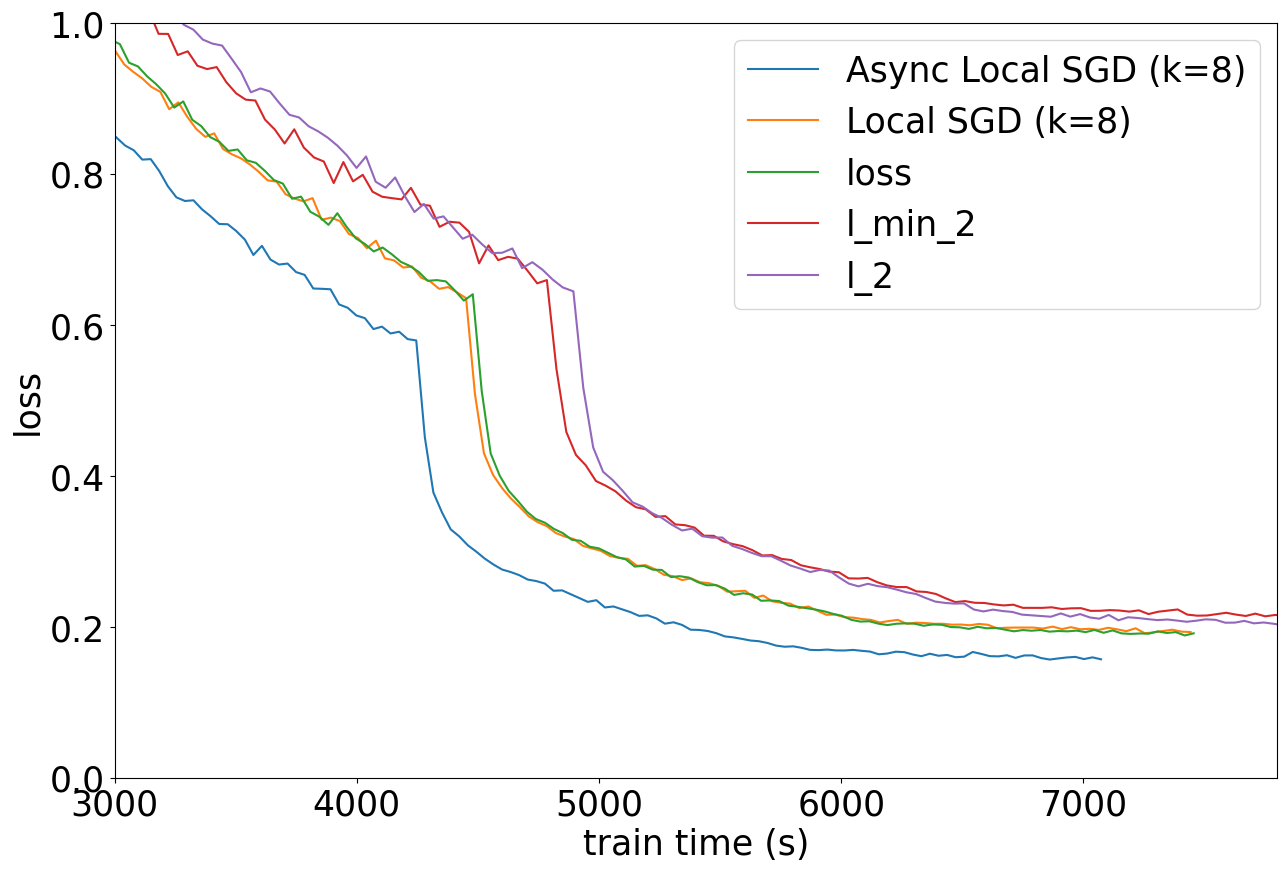

In [10]:
FONT_SIZE = 25
plt.figure(figsize=(15, 10),  dpi=100)

plt.rc('font', size=FONT_SIZE) # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE) # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE) # fontsize of the figure title

# losses = data['loss']
# epochs = len(sum_t)
# plt.subplot(121)
for idx, log in enumerate(logs):
    y = log['values']['t_loss']
    x = log['values']['sum_time']
    plt.plot(x, y, label=log['label'])
    plt.ylabel('loss')
    plt.xlabel('train time (s)')
    plt.ylim(0,1)
    plt.xlim(3000,7800)
    plt.legend()
    
plt.show()

In [126]:
for idx, log in enumerate(logs):
    y = log['values']['t_loss']
    print(log['label'], log['values']['v_acc1'][199])

DCL SGD 73.35
Async Local SGD (k=4) 72.74
Async Local SGD (k=8) 72.38
Async Local SGD (k=16) 72.5
Local SGD (k=4) 72.32
Local SGD (k=8) 72.17
Local SGD (k=16) 72.23
